In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_file = os.path.join("clean_df.csv")
all_data = pd.read_csv(data_file)
all_data.drop(columns="Unnamed: 0", inplace = True)

all_data

,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox
0,41280,Jefferson Park,2017-12-22,W,6104,False,False,False,False,False
1,41000,Cermak-Chinatown,2017-12-18,W,3636,False,False,True,False,False
2,40280,Central-Lake,2017-12-02,A,1270,False,False,False,False,False
3,40140,Dempster-Skokie,2017-12-19,W,1759,False,False,False,False,False
4,40690,Dempster,2017-12-03,U,499,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
196677,41700,Washington/Wabash,2020-09-26,A,2094,False,False,False,False,False
196678,41700,Washington/Wabash,2020-09-27,U,1423,False,False,False,False,False
196679,41700,Washington/Wabash,2020-09-28,W,2517,False,False,False,False,False
196680,41700,Washington/Wabash,2020-09-29,W,2710,False,False,False,False,False


In [2]:
cubs_df = pd.DataFrame(all_data, columns= ["station_id", "stationname", "date", "daytype", "rides", "Cubs"])
cubs_df

,station_id,stationname,date,daytype,rides,Cubs
0,41280,Jefferson Park,2017-12-22,W,6104,False
1,41000,Cermak-Chinatown,2017-12-18,W,3636,False
2,40280,Central-Lake,2017-12-02,A,1270,False
3,40140,Dempster-Skokie,2017-12-19,W,1759,False
4,40690,Dempster,2017-12-03,U,499,False
...,...,...,...,...,...,...
196677,41700,Washington/Wabash,2020-09-26,A,2094,False
196678,41700,Washington/Wabash,2020-09-27,U,1423,False
196679,41700,Washington/Wabash,2020-09-28,W,2517,False
196680,41700,Washington/Wabash,2020-09-29,W,2710,False


In [5]:
cubs_stations_df = cubs_df.loc[(cubs_df["station_id"] == 41420) | (cubs_df["station_id"] == 41320)]

cubs_stations_df

,station_id,stationname,date,daytype,rides,Cubs
9,41420,Addison-North Main,2017-12-19,W,6034,False
67,41320,Belmont-North Main,2017-12-28,W,6981,False
141,41320,Belmont-North Main,2017-12-12,W,11192,False
293,41420,Addison-North Main,2017-12-06,W,6136,False
430,41420,Addison-North Main,2017-12-22,W,4848,False
...,...,...,...,...,...,...
196287,41420,Addison-North Main,2020-09-26,A,1364,False
196288,41420,Addison-North Main,2020-09-27,U,1044,False
196289,41420,Addison-North Main,2020-09-28,W,1128,False
196290,41420,Addison-North Main,2020-09-29,W,1198,False


In [4]:
# plt.plot(cubs_df["daytype", "rides"])

In [7]:
gameday_df = cubs_stations_df[cubs_stations_df["Cubs"]== True]
gameday_df

,station_id,stationname,date,daytype,rides,Cubs
17629,41320,Belmont-North Main,2018-06-30,A,9147,True
17863,41320,Belmont-North Main,2018-04-11,W,12221,True
17944,41420,Addison-North Main,2018-06-29,W,17567,True
18014,41420,Addison-North Main,2018-04-12,W,11968,True
18148,41420,Addison-North Main,2018-06-19,W,17728,True
...,...,...,...,...,...,...
196277,41420,Addison-North Main,2020-09-16,W,1303,True
196279,41420,Addison-North Main,2020-09-18,W,1494,True
196280,41420,Addison-North Main,2020-09-19,A,1363,True
196281,41420,Addison-North Main,2020-09-20,U,1005,True


In [8]:
max_rides = gameday_df["rides"].max()
max_rides

27679

In [9]:
min_rides = gameday_df["rides"].min()
min_rides

739

In [10]:
gameday_df.describe()

,station_id,rides
count,546.000000,546.000000
mean,41370.000000,11194.217949
std,50.045851,4199.441145
min,41320.000000,739.000000
25%,41320.000000,10042.250000
50%,41370.000000,12256.000000
75%,41420.000000,13575.750000
max,41420.000000,27679.000000


In [11]:
avg_gameday = gameday_df["rides"].mean()
avg_gameday

11194.21794871795

In [13]:
nongameday_df = cubs_stations_df[cubs_stations_df["Cubs"]== False]
nongameday_df

,station_id,stationname,date,daytype,rides,Cubs
9,41420,Addison-North Main,2017-12-19,W,6034,False
67,41320,Belmont-North Main,2017-12-28,W,6981,False
141,41320,Belmont-North Main,2017-12-12,W,11192,False
293,41420,Addison-North Main,2017-12-06,W,6136,False
430,41420,Addison-North Main,2017-12-22,W,4848,False
...,...,...,...,...,...,...
196286,41420,Addison-North Main,2020-09-25,W,1538,False
196287,41420,Addison-North Main,2020-09-26,A,1364,False
196288,41420,Addison-North Main,2020-09-27,U,1044,False
196289,41420,Addison-North Main,2020-09-28,W,1128,False


In [14]:
nongameday_df.describe()

,station_id,rides
count,2192.000000,2192.000000
mean,41370.000000,7043.042883
std,50.011409,3914.935949
min,41320.000000,40.000000
25%,41320.000000,4329.250000
50%,41370.000000,6576.500000
75%,41420.000000,11127.750000
max,41420.000000,29581.000000


In [15]:
avg_nongameday = nongameday_df["rides"].mean()

In [17]:
daytype_df = pd.DataFrame(cubs_stations_df, columns = ["daytype", "rides"])
daytype_df

,daytype,rides
9,W,6034
67,W,6981
141,W,11192
293,W,6136
430,W,4848
...,...,...
196287,A,1364
196288,U,1044
196289,W,1128
196290,W,1198


In [18]:
grouped_daytypes = daytype_df.groupby(["daytype"]).mean()
grouped_daytypes

,rides
daytype,
A,7065.294872
U,5486.463303
W,8578.885983


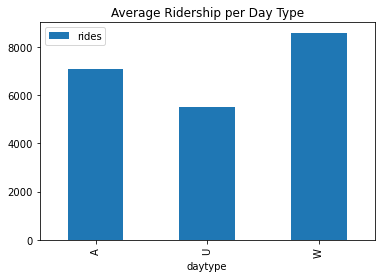

In [19]:
daytype_chart = grouped_daytypes.plot(kind="bar", title="Average Ridership per Day Type")

In [21]:
game_check_df = pd.DataFrame(cubs_stations_df, columns = ["Cubs","rides"])
game_check_df

,Cubs,rides
9,False,6034
67,False,6981
141,False,11192
293,False,6136
430,False,4848
...,...,...
196287,False,1364
196288,False,1044
196289,False,1128
196290,False,1198


In [22]:
grouped_game_check = game_check_df.groupby(["Cubs"]).sum()
grouped_game_check

,rides
Cubs,
False,15438350
True,6112043


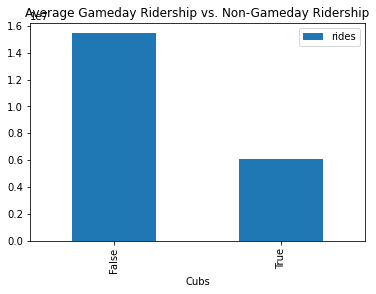

In [23]:
game_check_chart = grouped_game_check.plot(kind="bar", title="Average Gameday Ridership vs. Non-Gameday Ridership")

In [ ]:
saturday_df = gameday_df.loc[gameday_df["daytype"]== "A"]
sunday_holiday_df = gameday_df.loc[gameday_df["daytype"]== "U"]
weekday_df = gameday_df.loc[gameday_df["daytype"]== "W"]

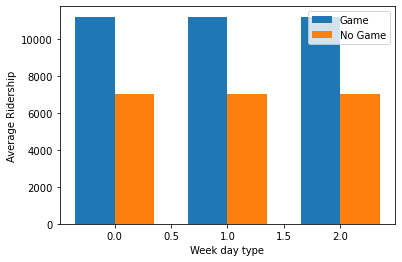

In [24]:
labels = ["Saturday", "Sunday/Holiday Week day Type", "Weekday"]

w = 0.4
x = daytype_df.mean()

bar1 = np.arange(len())
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, avg_gameday, width, label ="Game")
bar2 = ax.bar(x + width/2, avg_nongameday, width, label = "No Game")


# saturday_means = saturday_df["rides"].mean()
# sunday_holiday_means = sunday_holiday_df["rides"].mean()
# weekday_means = gameday_df["rides"].mean()


plt.ylabel("Average Ridership")
plt.xlabel("Week day type")
plt.legend()
plt.show()